In [11]:
# prompt: import daily-min-temperatures.csv from the internet

import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

df = pd.read_csv(url,parse_dates=True,index_col=0,header=0)
df.head()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

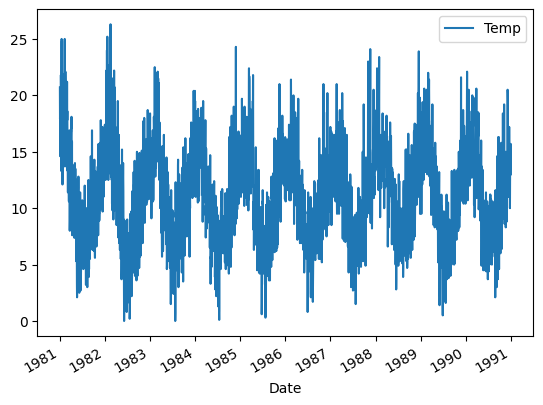

In [27]:
df.plot()

In [13]:
df.dtypes

,0
Temp,float64


## Differencing

In [17]:
differenced_series = df.diff(periods=1)

In [18]:
differenced_series

,Temp
Date,
1981-01-01,NaN
1981-01-02,-2.8
1981-01-03,0.9
1981-01-04,-4.2
1981-01-05,1.2
...,...
1990-12-27,-0.6
1990-12-28,-0.4
1990-12-29,-0.1


<Axes: xlabel='Date'>

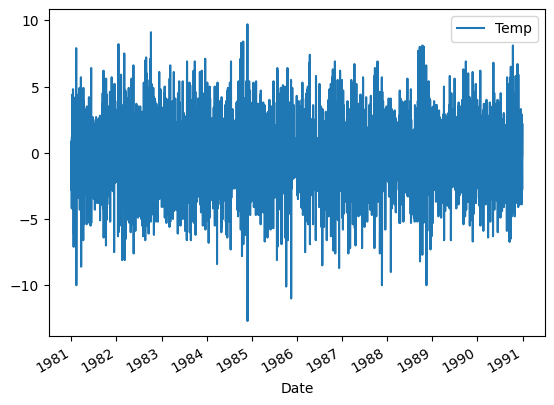

In [26]:
differenced_series.plot()

### (Manual Differencing)

In [24]:
import matplotlib.pyplot as plt

In [22]:
X = df.values
X[:5]

array([[20.7],
       [17.9],
       [18.8],
       [14.6],
       [15.8]])

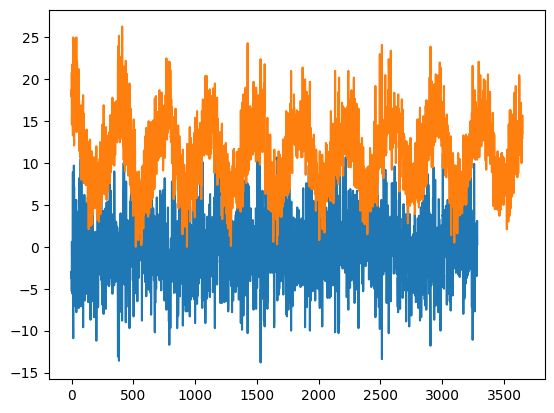

In [32]:
answer = []

for i in range(365,len(X)):
    value = X[i] - X[i-365]
    answer.append(value)

plt.plot(answer)
plt.plot(df.values)

### Polynomial Fitting

In [33]:
import numpy as np


In [47]:
differenced_series = differenced_series.dropna()  # Drop rows with NaN values

In [48]:
# Prepare the data
x = np.arange(len(differenced_series))
y = differenced_series.values.flatten()  # Convert to 1D array

In [49]:
x[:5], y[:5]

(array([0, 1, 2, 3, 4]), array([-2.8,  0.9, -4.2,  1.2,  0. ]))

In [50]:
# Choose the degree of the polynomial
degree = 3  # Example: 3rd degree polynomial

# Use numpy's polyfit to find the coefficients
coefficients = np.polyfit(x, y, degree)

# Create the polynomial function
polynomial = np.poly1d(coefficients)

# Generate predicted values
y_predicted = polynomial(x)

In [51]:
# Print the polynomial equation
print("Polynomial equation:", polynomial)

Polynomial equation:           3             2
8.05e-12 x - 4.892e-08 x + 8.713e-05 x - 0.04175


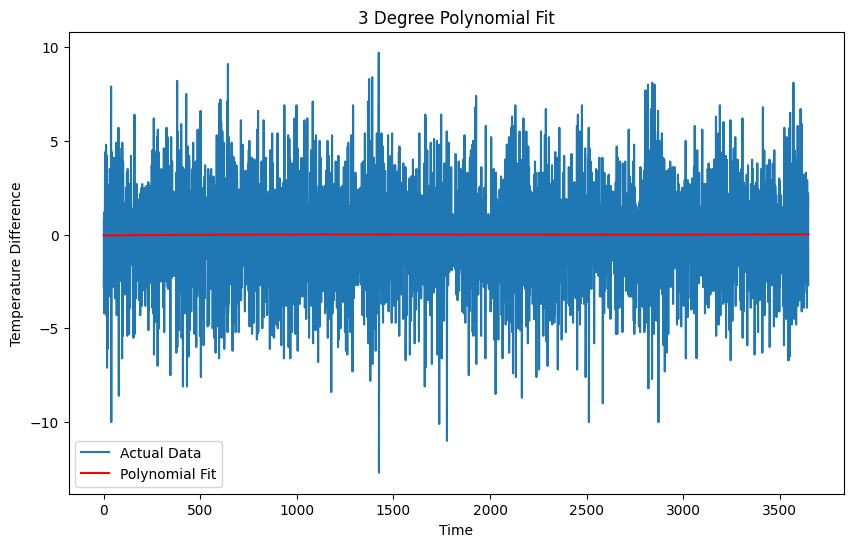

In [52]:
# Plot the results
plt.figure(figsize=(10, 6))

# ---
plt.plot(x, y, label='Actual Data')
plt.plot(x, y_predicted, label='Polynomial Fit', color='red')
# ---

plt.xlabel('Time')
plt.ylabel('Temperature Difference')
plt.title(f'{degree} Degree Polynomial Fit')
plt.legend()
plt.show()